
**Predicting future values for time serieses using Machine Learning
Steps :**

(STEP1) Loading and preparing the time series

(STEP2) Visualize the series



*   Seasonality
*   Trend
*   Stationary 



(STEP3) Get model order


*   Via Code : Auto ARIMA
*   Via visualiztation : 

    1 - Make stationary (apply differencing)

    2 - Use ACF and PACF graphs




(STEP4) Apply ARIMA and SARIMA models


1.   Fit the model

2.   Visualize the model series

3. Visualize future prediction of the model 

4. Calculate the RMS to compare later




THE 3rd VERSION, MIGHT UPDATE LATER :))

# (STEP1) Loading the data 

1. Loading the data into a pandas data frame
2. Clean the data (drop the nans)
3. Making the date as an approperiate python date object

In [ ]:
import pandas as pd

In [ ]:
# code for uploading files to colab
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/CATFISH.csv')
df.head()

,Date,Total
0,1/1/1986,9034
1,2/1/1986,9596
2,3/1/1986,10558
3,4/1/1986,9002
4,5/1/1986,9239


In [ ]:
print(df.info())
print(df.describe())
print("\nnull values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    324 non-null    object
 1   Total   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB
None
              Total
count    324.000000
mean   19643.984568
std     5039.324331
min     8196.000000
25%    15764.000000
50%    19660.500000
75%    23604.500000
max    30485.000000

null values:
 Date     0
Total    0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    324 non-null    datetime64[ns]
 1   Total   324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [ ]:
df_temp = pd.read_csv('/content/temp.csv')
df_temp.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
print(df_temp.info())
print(df_temp.describe())
print("\nnull values:\n",df_temp.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB
None
           MinTemp      MaxTemp      AvgTemp      Sunrise       Sunset
count  1821.000000  1821.000000  1821.000000  1825.000000  1825.000000
mean     38.637013    54.515102    46.818781   607.074521  1823.002740
std       3.798284     5.013654     4.143192    40.797585    49.555065
min      22.000000    36.000000    31.000000   543.000000  1742.000000
25%      36.000000    52.000000    44.000000   557.000000  1802.000000
50%      39.000000    55.000000    47.000000   614.000000  1831.000000
75%      41.000000    58.

In [ ]:
# this cell to be run only one time after the dataframe initialization
df_temp.dropna(axis = 0, inplace = True)

In [ ]:
df_temp.isnull().sum().sum()

0

In [ ]:
df_temp['DATE'] = pd.to_datetime(df_temp.DATE)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1821 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1821 non-null   int64         
 5   Sunset   1821 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 99.6 KB


# (STEP2) Visualizing the data
Observing the changes in the time series through time using MatPlotLib, and decompose the data to observe the trend and seasonality

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,Date,Total
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239


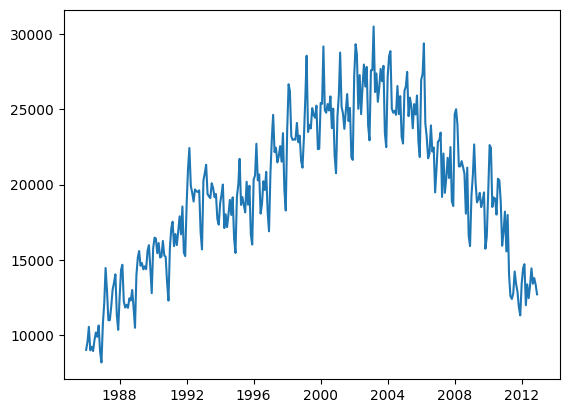

In [ ]:
# observing the correlation between Date and Total
plt.plot(df.Date,df.Total)
plt.show()

## Data Decomposition
Decomposition is a statistical job that involves breaking down Time Series data into many components or identifying seasonality and trend from a series of data

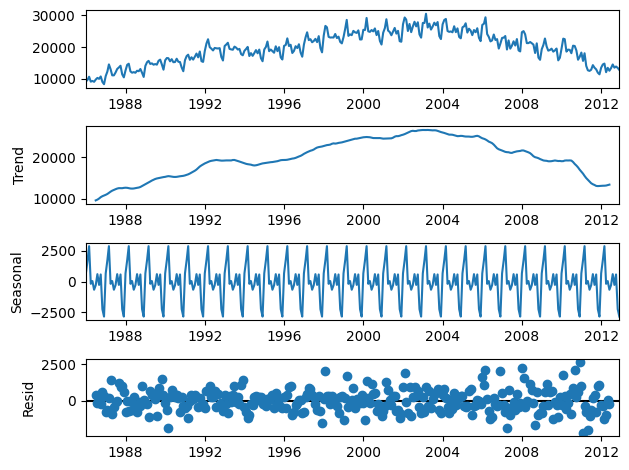

In [ ]:
# observing the data Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.set_index('Date', inplace = False), model = 'additive')
decomposition.plot()
plt.show()

In [ ]:
df_temp.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


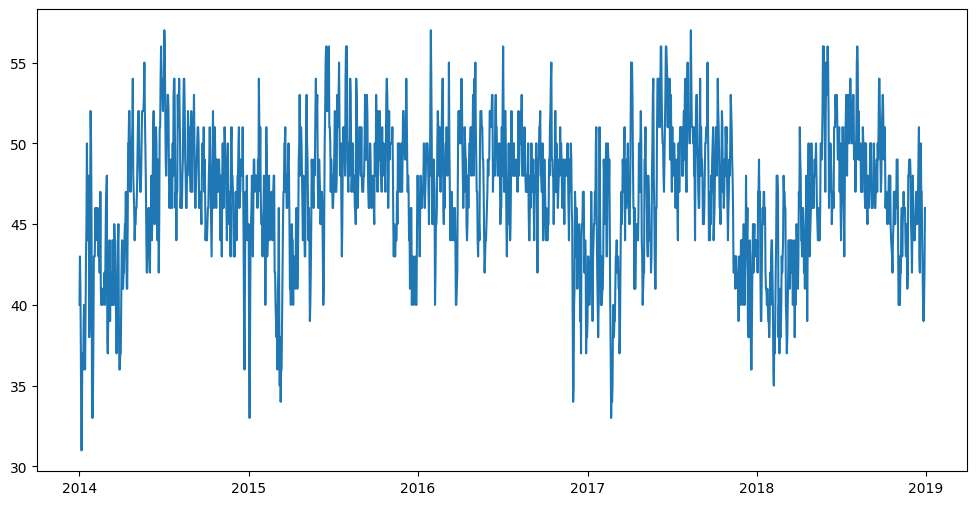

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df_temp.DATE, df_temp.AvgTemp)

plt.show()

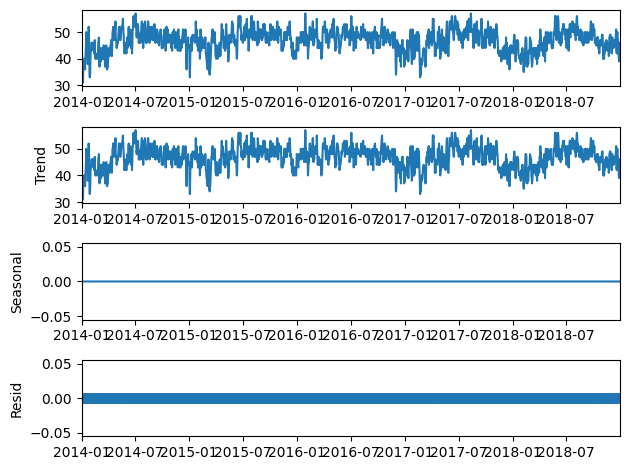

In [ ]:
decomposition = seasonal_decompose(df_temp[["DATE", "AvgTemp"]].set_index('DATE', inplace = False), model = 'additive', period = 1)
decomposition.plot()
plt.show()

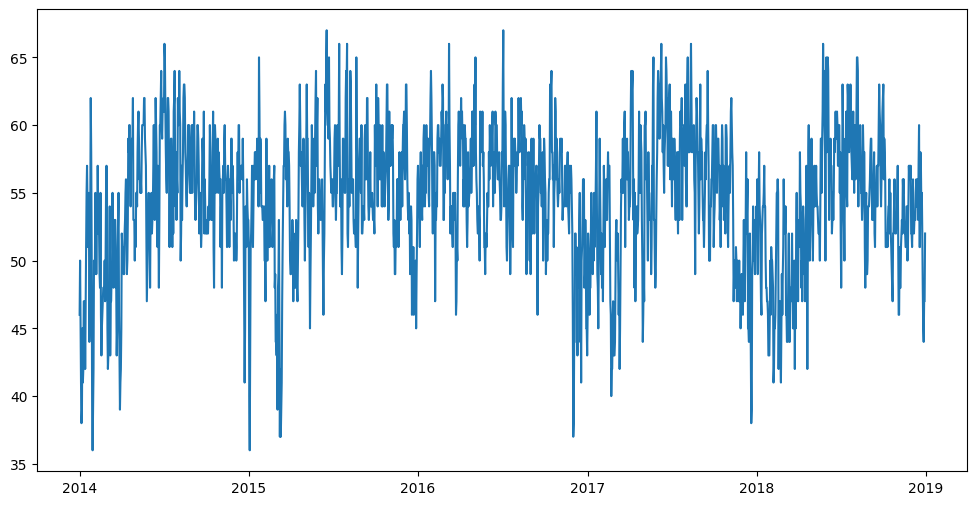

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df_temp.DATE, df_temp.MaxTemp)

plt.show()

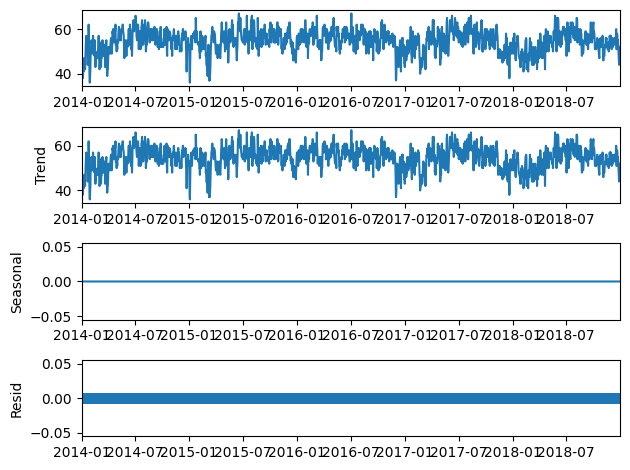

In [ ]:
decomposition = seasonal_decompose(df_temp[["DATE", "MaxTemp"]].set_index('DATE', inplace = False), model = 'additive', period = 1)
decomposition.plot()
plt.show()

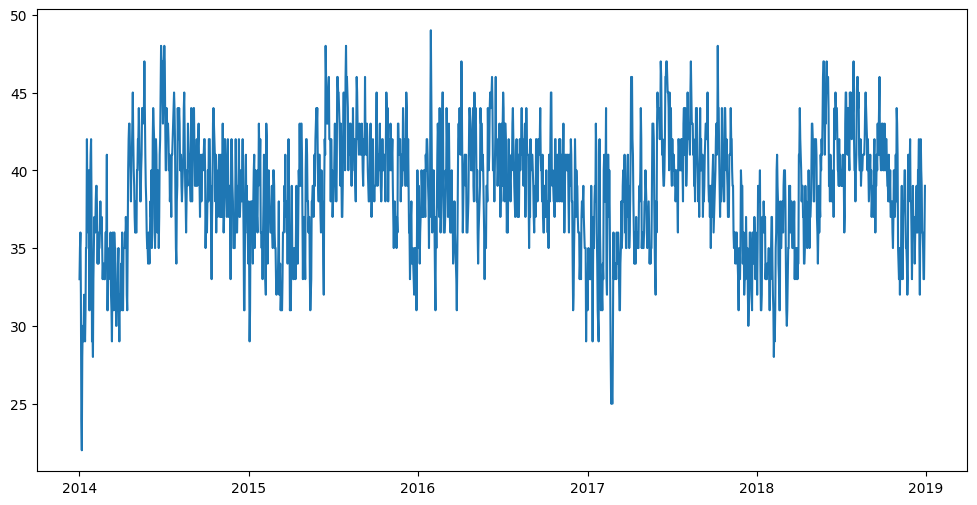

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df_temp.DATE, df_temp.MinTemp)

plt.show()

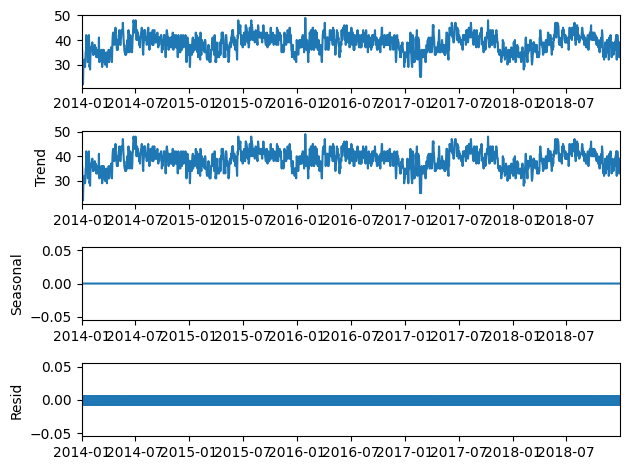

In [ ]:
decomposition = seasonal_decompose(df_temp[["DATE", "MinTemp"]].set_index('DATE', inplace = False), model = 'additive', period = 1)
decomposition.plot()
plt.show()

# (STEP3) Stationary Check
Before building the model we must ensure that the time series is stationary, and there is 2 ways to do so
1.   Rolling statistics 

Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis)

2.   Augmented Dickey-Fuller Test

The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics.

In [ ]:
df.set_index('Date', inplace = True)

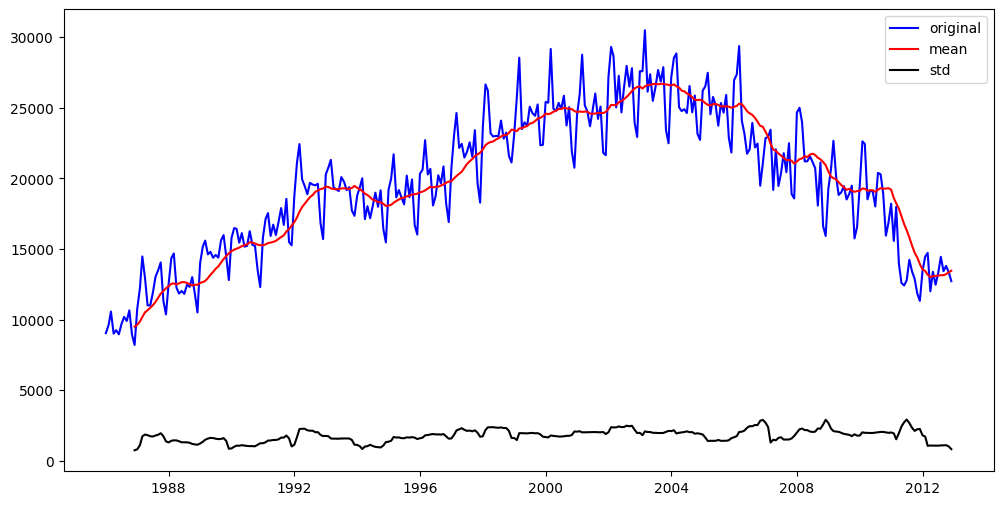

In [ ]:
### Rolling statistics
fig = plt.figure(figsize=(12, 6))
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df,color = 'blue', label = "original")
plt.plot(rolling_mean, color = 'red', label = 'mean')
plt.plot(rolling_std, color = 'black', label = "std")
plt.legend(loc = "best")
plt.show()

In [ ]:
### Adfuller Tesy
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Total'])
print("the p value is : ",test_result[1])

the p value is :  0.48866351571884237


**CHECK RESULT**

We nottice from the graph that the rolling mean cant be approximated to a straight line by bare eye.

According to the Adfuller test: p value is > 0.05

So, THIS time series are NOT stationary.

In [ ]:
df_temp.set_index('DATE', inplace = True)

In [ ]:
df_temp.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


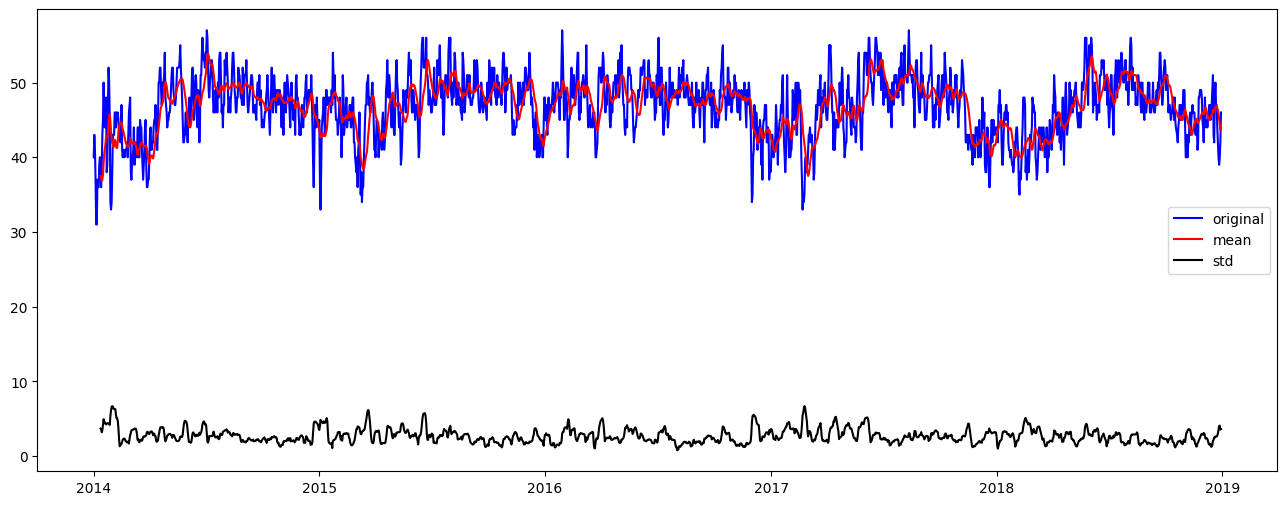

In [ ]:
### Rolling statistics
fig = plt.figure(figsize=(16, 6))
rolling_mean = df_temp['AvgTemp'].rolling(window = 12).mean()
rolling_std = df_temp['AvgTemp'].rolling(window = 12).std()
plt.plot(df_temp['AvgTemp'],color = 'blue', label = "original")
plt.plot(rolling_mean, color = 'red', label = 'mean')
plt.plot(rolling_std, color = 'black', label = "std")
plt.legend(loc = "best")
plt.show()

In [ ]:
### Adfuller Test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df_temp['AvgTemp'])
print("the p value is : ",test_result[1])

the p value is :  8.675937480199653e-09


**CHECK RESULT**

We notice from the graph that the rolling mean can be approximated to a straight line by bare eye.

According to the Adfuller test: p value is < 0.05

So, THIS time series is stationary.

# (STEP4) Make Stationary
To make stationary, we'll use **differecing**.
Differencing in statistics is a transformation applied to time-series data in order to make it stationary. This allows the properties do not depend on the time of observation, eliminating trend and seasonality and stabilizing the mean of the time series


In [ ]:
df.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [ ]:
# make a new column with name "First differenace" = Totla[i] - Totla[i-1]
df['First Difference'] = df['Total'] - df['Total'].shift(1)

# make a new column with name "Seasonal differenace" = Totla[i] - Totla[i-N]
# I kept trying several values of N tell we found optimal value to decrease the P value on the test
N = 19 
df['Seasonal Difference'] = df['Total'] - df['Total'].shift(N)

'''
! - you can use ssome built-in function in pandas
>>> First_diff_dataframe = dataframe.diff(periods = 1)
returns a new dataframe with it's values subtracted one row of its previous
'''
df.head()

,Total,First Difference,Seasonal Difference
Date,,,
1986-01-01,9034,NaN,NaN
1986-02-01,9596,562.0,NaN
1986-03-01,10558,962.0,NaN
1986-04-01,9002,-1556.0,NaN
1986-05-01,9239,237.0,NaN


In [ ]:
### Adfuller Test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Seasonal Difference'].dropna())
print("the p value is : ",test_result[1])

the p value is :  0.011884841846878842


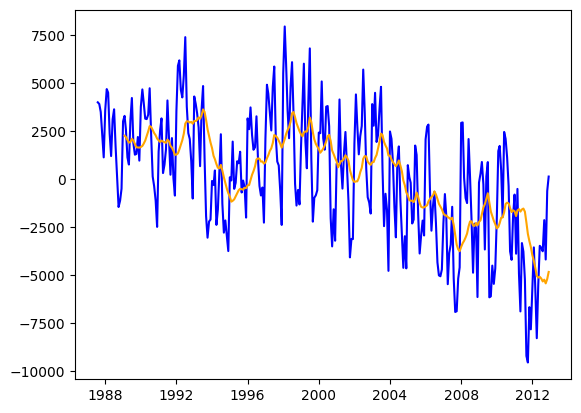

In [ ]:
plt.plot(df['Seasonal Difference'], color = 'blue')
plt.plot(df['Seasonal Difference'].rolling(window = 19).mean(), color = 'orange')
plt.show()

In [ ]:
### Adfuller Test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['First Difference'].dropna())
print("the p value is : ",test_result[1])

the p value is :  0.0004252370851714975


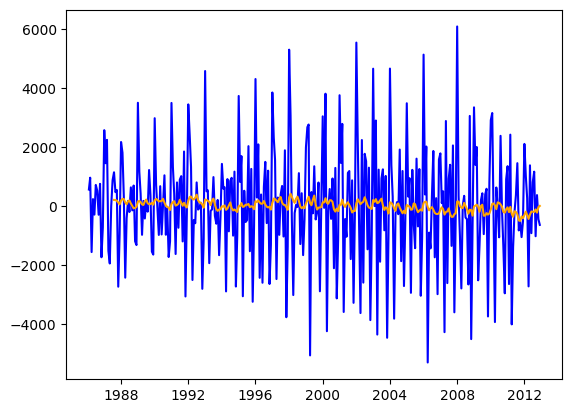

In [ ]:
plt.plot(df['First Difference'], color = 'blue')
plt.plot(df['First Difference'].rolling(window = 19).mean(), color = 'orange')
plt.show()

NOTICE: First Difference is much more stationary that seasonal differnece

# (STEP5) ACF and PACF

  1.  Auto-Correlation Function (ACF):

Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit (time period). In ACF, the correlation coefficient is in the y-axis whereas the number of lags is shown in the x-axis.

 1.  Partial Auto-Correlation Function (PACF):

As the name implies, PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points. We can use PACF to determine the optimal number of terms to use in the AR model. The number of terms determines the order of the model.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


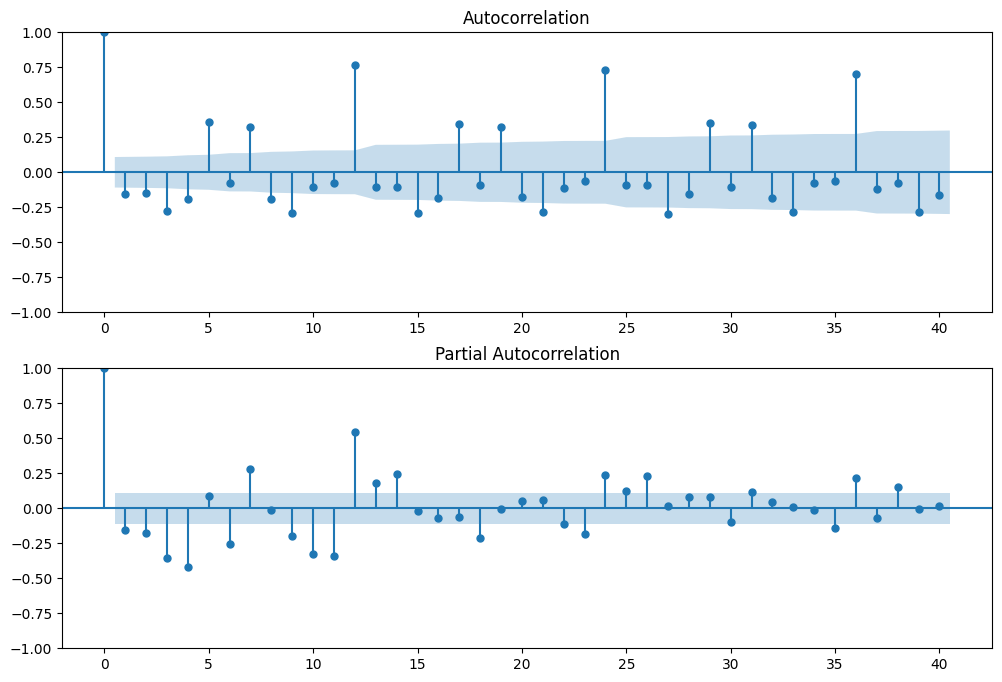

In [ ]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['First Difference'].dropna(), ax = ax1,lags = 40)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['First Difference'].dropna(), ax = ax2,lags = 40)

with differencing = 1

p = 20

q = 19

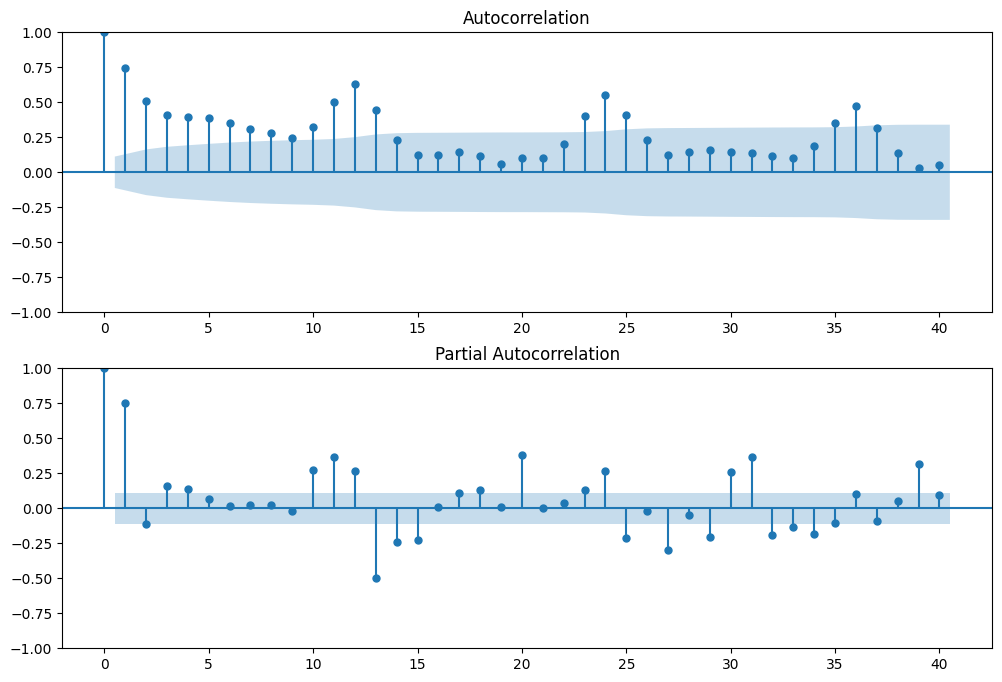

In [ ]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Difference'].dropna(), ax = ax1,lags = 40)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Difference'].dropna(), ax = ax2,lags = 40)

with differencing = 19

p = 20

q = 19

NOTICE: That's apperant that the first difference is much more stationary than the seasonal difference

# (STEP6) ARIMA model

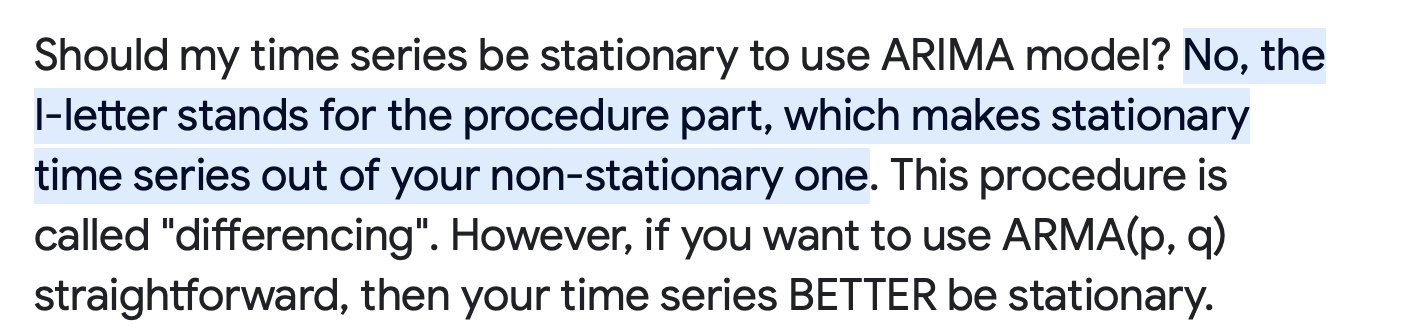

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

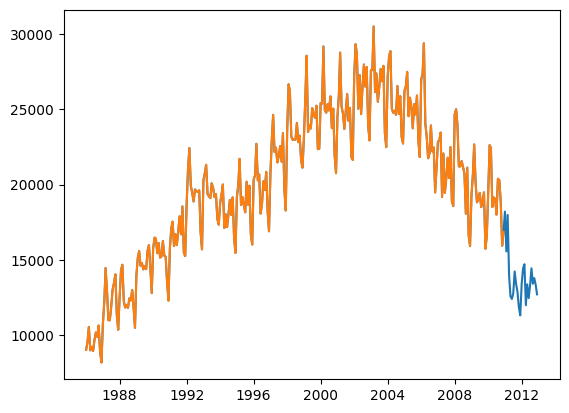

In [ ]:
# remove the tail that might cause errors 
# you might not need that step very much
plt.plot(df['Total'])
plt.plot(df['Total'][:-24])
df = df['Total'][:-24]

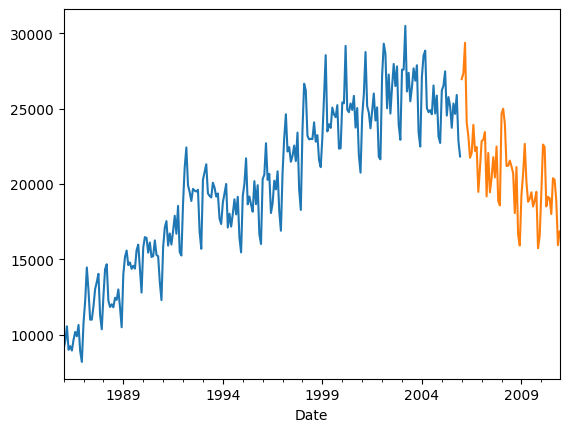

In [ ]:
# train test split, with no random - we need to test on future values kda kda ..
train = df[:int(0.8 * df.shape[0])]
test = df[int(0.8 * df.shape[0]):]


train.plot()
test.plot()
plt.show()

In [ ]:
## TRY THE AUTO ARIMA FOR THE BEST ORDER
train.shape

(240,)

In [ ]:
model = ARIMA(train, order = (20,1,19))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  240
Model:               ARIMA(20, 1, 19)   Log Likelihood               -1947.915
Date:                Tue, 25 Apr 2023   AIC                           3975.830
Time:                        03:48:16   BIC                           4114.888
Sample:                    01-01-1986   HQIC                          4031.866
                         - 12-01-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1936      0.982     -0.197      0.844      -2.119       1.731
ar.L2         -0.2248      1.051     -0.214      0.831      -2.286       1.836
ar.L3          0.1029      0.701      0.147      0.883      -1.272       1.477
ar.L4          0.2772      0.671      0.413      0.680      -1.039       1.593
ar.L5          0.0512      0.656      0.078      0.938      -1.234       1.337
ar.L6          0.1068      0.520      0.205      0.837      -0.913       1.126
ar.L7         -0.1048      0.381     -0.275      0.783      -0.852       0.642
ar.L8         -0.3407      0.362     -0.940      0.347      -1.051       0.369
ar.L9          0.0122      0.137      0.089      0.929      -0.256       0.281
ar.L10        -0.0816      0.124     -0.657      0.511      -0.325       0.162
ar.L11         0.1343      0.157      0.856      0.392      -0.173       0.442
ar.L12         0.7422      0.205      3.617      0.000       0.340       1.144
ar.L13         0.3318      0.828      0.401      0.688      -1.290       1.954
ar.L14         0.1115      0.939      0.119      0.905      -1.728       1.951
ar.L15        -0.1132      0.657     -0.172      0.863      -1.401       1.175
ar.L16        -0.3483      0.627     -0.556      0.578      -1.577       0.880
ar.L17         0.0736      0.680      0.108      0.914      -1.258       1.406
ar.L18        -0.3394      0.640     -0.530      0.596      -1.593       0.915
ar.L19         0.2707      0.411      0.658      0.510      -0.535       1.077
ar.L20         0.2241      0.209      1.075      0.283      -0.185       0.633
ma.L1         -0.2540      0.984     -0.258      0.796      -2.182       1.674
ma.L2         -0.0081      0.984     -0.008      0.993      -1.938       1.921
ma.L3         -0.2116      0.679     -0.312      0.755      -1.543       1.120
ma.L4         -0.2088      0.773     -0.270      0.787      -1.723       1.305
ma.L5          0.1172      0.590      0.198      0.843      -1.040       1.274
ma.L6          0.0844      0.577      0.146      0.884      -1.046       1.215
ma.L7          0.0651      0.583      0.112      0.911      -1.079       1.209
ma.L8          0.3053      0.516      0.592      0.554      -0.706       1.316
ma.L9         -0.2149      0.336     -0.639      0.523      -0.874       0.444
ma.L10         0.1411      0.189      0.745      0.456      -0.230       0.512
ma.L11        -0.2037      0.289     -0.704      0.481      -0.771       0.363
ma.L12        -0.3280      0.326     -1.006      0.314      -0.967       0.311
ma.L13        -0.0446      0.555     -0.080      0.936      -1.131       1.042
ma.L14         0.1127      0.558      0.202      0.840      -0.981       1.206
ma.L15         0.1372      0.459      0.299      0.765      -0.763       1.037
ma.L16         0.1889      0.521      0.362      0.717      -0.833       1.211
ma.L17        -0.2390      0.467     -0.512      0.609      -1.154       0.676
ma.L18         0.3136      0.629      0.499      0.618      -0.919       1.546
ma

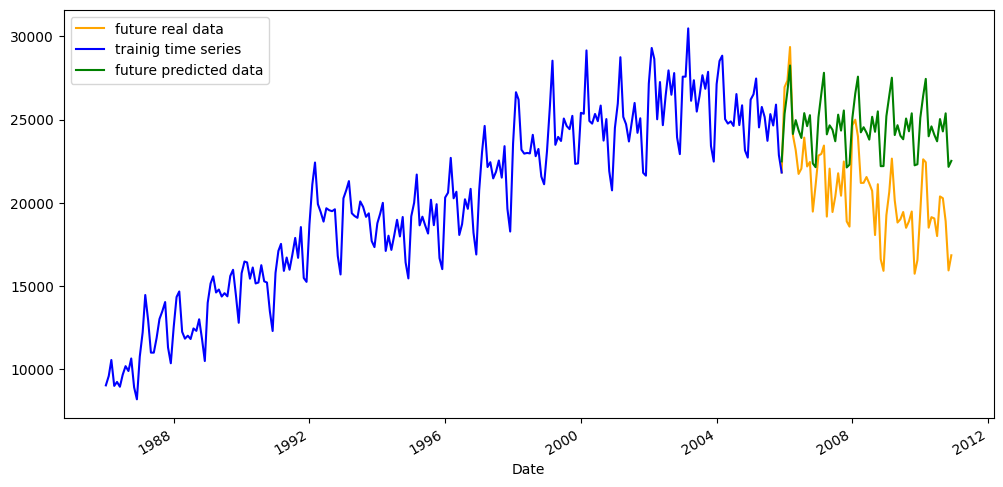

In [ ]:
forecast = model_fit.predict(start = train.shape[0]- test.shape[0] - 2, end = train.shape[0] + test.shape[0] -1 )
fig = plt.figure(figsize = (12,6))
plt.plot(df[240-1:], color = 'orange', label = "future real data")
train.plot(label = "trainig time series", color = 'blue')
plt.plot(forecast[test.shape[0] + 1:], color = 'green', label = "future predicted data")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

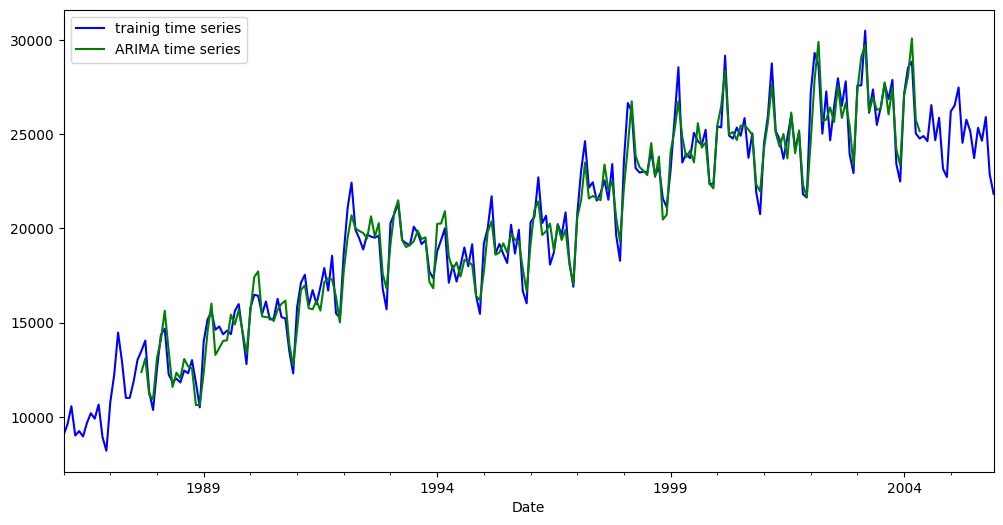

In [ ]:
fig = plt.figure(figsize = (12,6))
forecast = model_fit.predict(start = 20, end = 220  )
fig = plt.figure(figsize = (12,6))
train.plot(label = "trainig time series", color = 'blue')
forecast.plot(label = "ARIMA time series", color = 'green')
plt.legend()
plt.show()

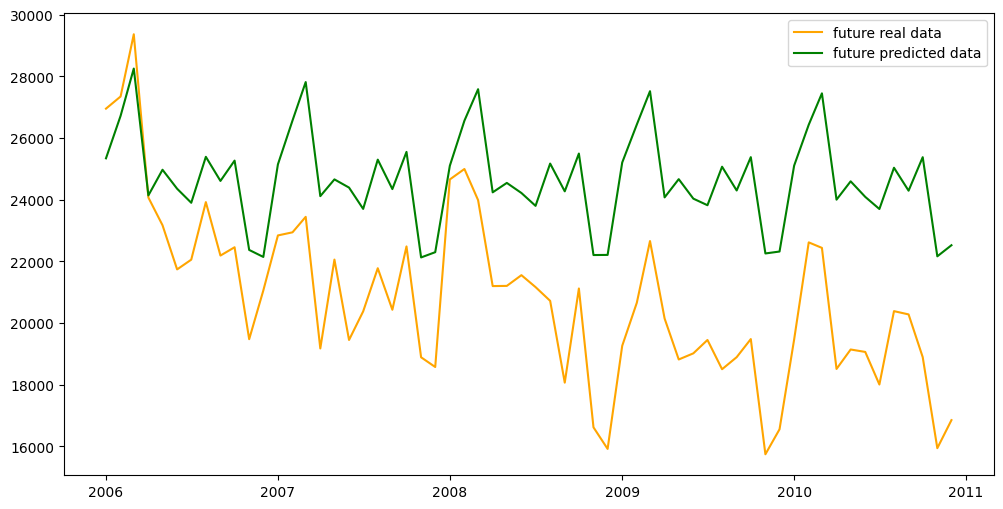

In [ ]:
forecast = model_fit.predict(start = train.shape[0]- test.shape[0] - 1, end = train.shape[0] + test.shape[0] -1 )
fig = plt.figure(figsize = (12,6))
plt.plot(test, color = 'orange', label = "future real data")
plt.plot(forecast[test.shape[0] + 1:], color = 'green', label = "future predicted data")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, forecast[test.shape[0] + 1:]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4313.573


# Seasonal ARIMA